# Econ ML
https://github.com/Microsoft/EconML/blob/master/notebooks/Generalized%20Random%20Forests.ipynb

In [1]:
from econml.grf import CausalForest, CausalIVForest, RegressionForest
from econml.dml import CausalForestDML
import numpy as np
import scipy.special
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 7)
from sklearn.tree import plot_tree

2021-11-24 19:09:31.045473: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-24 19:09:31.045510: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
np.random.seed(123)
n_samples = 2000
n_features = 10
n_treatments = 1
# true_te = lambda X: np.hstack([X[:, [0]]**2 + 1, np.ones((X.shape[0], n_treatments - 1))])
# true_te = lambda X: np.hstack([X[:, [0]]>0, np.ones((X.shape[0], n_treatments - 1))])
true_te = lambda X: np.hstack([(X[:, [0]]>0) * X[:, [0]],
                               np.ones((X.shape[0], n_treatments - 1))*np.arange(1, n_treatments).reshape(1, -1)])
X = np.random.normal(0, 1, size=(n_samples, n_features))
T = np.random.normal(0, 1, size=(n_samples, n_treatments))
for t in range(n_treatments):
    # T[:, t] = np.random.binomial(1, scipy.special.expit(X[:, 0]))
    T[:, t] = np.random.poisson(5, X.shape[0])
y = np.sum(true_te(X) * T, axis=1, keepdims=True) + np.random.normal(0, .5, size=(n_samples, 1))
X_test = X[:min(100, n_samples)].copy()
X_test[:, 0] = np.linspace(np.percentile(X[:, 0], 1), np.percentile(X[:, 0], 99), min(100, n_samples))

In [3]:
X_test

array([[-2.24617472e+00,  9.97345447e-01,  2.82978498e-01,
        -1.50629471e+00, -5.78600252e-01,  1.65143654e+00,
        -2.42667924e+00, -4.28912629e-01,  1.26593626e+00,
        -8.66740402e-01],
       [-2.19992633e+00, -9.47089689e-02,  1.49138963e+00,
        -6.38901997e-01, -4.43981960e-01, -4.34351276e-01,
         2.20593008e+00,  2.18678609e+00,  1.00405390e+00,
         3.86186399e-01],
       [-2.15367793e+00,  1.49073203e+00, -9.35833868e-01,
         1.17582904e+00, -1.25388067e+00, -6.37751502e-01,
         9.07105196e-01, -1.42868070e+00, -1.40068720e-01,
        -8.61754896e-01],
       [-2.10742953e+00, -2.79858911e+00, -1.77153310e+00,
        -6.99877235e-01,  9.27462432e-01, -1.73635683e-01,
         2.84591590e-03,  6.88222711e-01, -8.79536343e-01,
         2.83627324e-01],
       [-2.06118113e+00, -1.72766949e+00, -3.90899794e-01,
         5.73805862e-01,  3.38589051e-01, -1.18304945e-02,
         2.39236527e+00,  4.12912160e-01,  9.78736006e-01,
         2.

In [79]:
est = CausalForest(criterion='het', n_estimators=400, min_samples_leaf=5, max_depth=None,
                   min_var_fraction_leaf=None, min_var_leaf_on_val=True,
                   min_impurity_decrease = 0.0, max_samples=0.45, min_balancedness_tol=.45,
                   warm_start=False, inference=True, fit_intercept=True, subforest_size=4,
                   honest=True, verbose=0, n_jobs=-1, random_state=1235)
est.fit(X, T, y)

CausalForest(criterion='het', min_var_leaf_on_val=True, n_estimators=400,
             random_state=1235)

In [80]:
point, lb, ub = est.predict(X_test, interval=True, alpha=0.01)

In [81]:
point = est.predict(X_test)

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


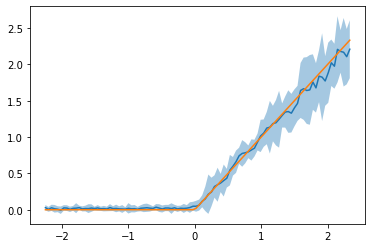

In [82]:
for t in range(n_treatments):
    plt.plot(X_test[:, 0], point[:, t])
    if est.inference:
        plt.fill_between(X_test[:, 0], lb[:, t], ub[:, t], alpha=.4)
    plt.plot(X_test[:, 0], true_te(X_test)[:, t])
plt.show()

In [83]:
true_te(X_test)

array([[-0.        ],
       [-0.        ],
       [-0.        ],
       [-0.        ],
       [-0.        ],
       [-0.        ],
       [-0.        ],
       [-0.        ],
       [-0.        ],
       [-0.        ],
       [-0.        ],
       [-0.        ],
       [-0.        ],
       [-0.        ],
       [-0.        ],
       [-0.        ],
       [-0.        ],
       [-0.        ],
       [-0.        ],
       [-0.        ],
       [-0.        ],
       [-0.        ],
       [-0.        ],
       [-0.        ],
       [-0.        ],
       [-0.        ],
       [-0.        ],
       [-0.        ],
       [-0.        ],
       [-0.        ],
       [-0.        ],
       [-0.        ],
       [-0.        ],
       [-0.        ],
       [-0.        ],
       [-0.        ],
       [-0.        ],
       [-0.        ],
       [-0.        ],
       [-0.        ],
       [-0.        ],
       [-0.        ],
       [-0.        ],
       [-0.        ],
       [-0.        ],
       [-0

In [135]:
from econml.policy import PolicyForest
policy_forest = PolicyForest()
policy_forest.fit(X, y)
policy_forest.predict_value(X)

array([[ 0.08661825],
       [-0.11655467],
       [ 0.06810664],
       [-0.06303157],
       [-0.19939329],
       [-0.2819365 ],
       [-0.08994256],
       [-0.23288297],
       [-0.35414047],
       [-0.14806464],
       [-0.21960668],
       [ 0.09716677],
       [-0.30791288],
       [-0.19411884],
       [-0.2315164 ],
       [-0.23288297],
       [-0.28101467],
       [-0.28101467],
       [-0.13817087],
       [ 0.11701323],
       [ 0.04394579],
       [-0.30791288],
       [ 0.00265886],
       [-0.34275442],
       [ 0.14696463],
       [-0.19411884],
       [-0.03933213],
       [-0.02001345],
       [ 0.04783856],
       [-0.16052915],
       [ 0.0468299 ],
       [-0.08994256],
       [-0.08994256],
       [-0.23667448],
       [-0.05744422],
       [ 0.04580194],
       [ 0.13725146],
       [ 0.10219272],
       [-0.11321283],
       [ 0.07079639],
       [-0.22048797],
       [-0.08994256],
       [-0.20633572],
       [ 0.0967154 ],
       [ 0.08877277],
       [ 0

In [174]:
?SGDClassifier

In [181]:
y.ravel().shape


The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.

The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.

The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.

The MathtextBackendBitmap class was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.


In [218]:
np.unique(np.round(y))

array([-2., -1., -0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.,
       11., 12., 13., 14., 15., 16., 17., 18., 20., 21., 24., 25.])

In [220]:
from econml.policy import PolicyForest, DRPolicyTree, DRPolicyForest
from sklearn.linear_model import MultiTaskElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor, SGDClassifier

# fit a binary decision forest
policy = DRPolicyForest(model_regression=SGDClassifier(loss='log'),
                        model_propensity=SGDClassifier(loss='log'),
                        max_depth=10, min_impurity_decrease=0.01, honest=True)
policy.fit(np.round(y.ravel()), T, X=X, W=None)
# predict the recommended treatment
recommended_T = policy.predict(X_test)
# plot the first tree in the ensemble
plt.figure(figsize=(10,5))
# get feature importances
importances = policy.feature_importances_

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


<Figure size 720x360 with 0 Axes>

In [221]:
recommended_T

array([ 6,  6,  9,  4,  6,  6,  7, 11,  7,  8,  8,  4,  6,  6, 11,  7,  6,
        8,  9,  8,  8,  7,  8,  6,  8, 12,  6,  8,  8,  4,  8,  7,  8,  7,
       11,  3,  7,  8, 12,  8,  8,  3,  8,  6,  6,  8,  6,  3,  6,  8,  9,
        8,  7,  6,  8,  7,  8,  6,  8,  2,  6,  8,  8,  8,  8,  8,  8,  6,
        8,  8,  3,  8,  8,  7,  8,  8,  8,  6,  8,  8, 13, 10, 11,  8,  8,
        8,  6,  6,  8,  6,  8,  8,  8,  8,  8,  8,  8,  6,  8,  3])

In [111]:
from econml.dynamic.dml import DynamicDML

np.random.seed(123)

n_panels = 100  # number of panels
n_periods = 3  # number of time periods per panel
n = n_panels * n_periods
groups = np.repeat(a=np.arange(n_panels), repeats=n_periods, axis=0)
X = np.random.normal(size=(n, 1))
T = np.random.normal(size=(n, 2))
y = np.random.normal(size=(n, ))
est = DynamicDML()
est.fit(y, T, X=X, W=None, groups=groups, inference="auto")

'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please

In [129]:
T

array([[ 7.65054846e-01, -8.28988834e-01],
       [-6.59151311e-01,  6.11123550e-01],
       [-1.44013347e-01,  1.31660560e+00],
       [-7.04342147e-01,  7.50609917e-01],
       [ 3.42637981e-01, -1.26437564e-01],
       [ 1.17591077e+00,  6.80071533e-01],
       [-1.00496715e+00,  6.40218680e-01],
       [ 1.37499063e+00, -1.30444689e-01],
       [-2.48655850e-01, -6.69647148e-01],
       [-1.36038857e-02,  6.86200686e-01],
       [-8.17668300e-01, -1.34635756e+00],
       [-3.75749911e-01, -1.37972498e+00],
       [ 5.23218441e-01, -4.26689770e-01],
       [-1.75540184e+00, -3.48607515e-01],
       [-1.92614986e-01,  4.49135613e-01],
       [-1.45363543e-01,  1.86872646e+00],
       [-5.18703852e-01, -6.23985486e-02],
       [-1.02910614e-01, -2.82628384e-01],
       [ 1.42425585e-01,  5.41231297e-01],
       [ 1.34009870e+00, -1.56925613e+00],
       [-5.10342874e-01, -4.47771425e-01],
       [ 9.37850297e-01, -3.56663061e-01],
       [-1.89517559e+00,  8.77304639e-02],
       [-3.

In [115]:
est.const_marginal_effect(X[:2])

array([[-0.33649377, -0.04879177, -0.06100945,  0.04287695, -0.20427584,
         0.00667271],
       [-0.10143508,  0.43307505,  0.05471369, -0.21757857, -0.10151656,
        -0.15925468]])

In [131]:
est.effect(X[:2], T0=0, T1=1)

A scalar was specified but there are multiple treatments; the same value will be used for each treatment.  Consider specifyingall treatments, or using the const_marginal_effect method.
A scalar was specified but there are multiple treatments; the same value will be used for each treatment.  Consider specifyingall treatments, or using the const_marginal_effect method.


array([-0.60102117, -0.09199615])

In [150]:
from econml.dml import CausalForestDML
from sklearn.ensemble import GradientBoostingRegressor
est = CausalForestDML(model_y=GradientBoostingRegressor(),
                      model_t=GradientBoostingRegressor())
est.fit(y.ravel(), T, X=X, W=None)
point = est.effect(X, T0=t, T1=t)
me = est.const_marginal_effect_interval(X, alpha=.05)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [211]:
from sklearn.linear_model import MultiTaskElasticNet
from econml.dml import LinearDML
est = LinearDML(model_y=MultiTaskElasticNet(alpha=0.1),
                model_t=MultiTaskElasticNet(alpha=0.1))
est.fit(y, np.concatenate((T, T**2), axis=1), X=X, W=None)

# a_hat[i,j] contains the elasticity of the demand of product i on the price of product j
est.marginal_effect(np.concatenate((T, T**2), axis=1)[0, :].reshape(1, 2),
                    np.random.normal(0, 1, 10).reshape(1, 10))

array([[[ 0.7208049 , -0.03151394]]])

In [222]:

# Main imports
from econml.metalearners import TLearner, SLearner, XLearner, DomainAdaptationLearner

# Helper imports
import numpy as np
from numpy.random import binomial, multivariate_normal, normal, uniform
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor
import matplotlib.pyplot as plt

In [223]:
# Define DGP
def generate_data(n, d, controls_outcome, treatment_effect, propensity):
    """Generates population data for given untreated_outcome, treatment_effect and propensity functions.

    Parameters
    ----------
        n (int): population size
        d (int): number of covariates
        controls_outcome (func): untreated outcome conditional on covariates
        treatment_effect (func): treatment effect conditional on covariates
        propensity (func): probability of treatment conditional on covariates
    """
    # Generate covariates
    X = multivariate_normal(np.zeros(d), np.diag(np.ones(d)), n)
    # Generate treatment
    T = np.apply_along_axis(lambda x: binomial(1, propensity(x), 1)[0], 1, X)
    # Calculate outcome
    Y0 = np.apply_along_axis(lambda x: controls_outcome(x), 1, X)
    treat_effect = np.apply_along_axis(lambda x: treatment_effect(x), 1, X)
    Y = Y0 + treat_effect * T
    return (Y, T, X)

In [224]:
# controls outcome, treatment effect, propensity definitions
def generate_controls_outcome(d):
    beta = uniform(-3, 3, d)
    return lambda x: np.dot(x, beta) + normal(0, 1)
treatment_effect = lambda x: (1 if x[1] > 0.1 else 0)*8
propensity = lambda x: (0.8 if (x[2]>-0.5 and x[2]<0.5) else 0.2)

In [225]:

# DGP constants and test data
d = 5
n = 1000
n_test = 250
controls_outcome = generate_controls_outcome(d)
X_test = multivariate_normal(np.zeros(d), np.diag(np.ones(d)), n_test)
delta = 6/n_test
X_test[:, 1] = np.arange(-3, 3, delta)

In [226]:
Y, T, X = generate_data(n, d, controls_outcome, treatment_effect, propensity)

In [241]:
import matplotlib.pyplot as plt
import numpy as np
from econml.policy import PolicyTree, PolicyForest
from econml.policy import DRPolicyTree, DRPolicyForest
from econml.dml import LinearDML
from econml.cate_interpreter import SingleTreePolicyInterpreter, SingleTreeCateInterpreter
import pandas as pd

X = np.random.normal(size=(1000, 10))
y = np.hstack([X[:, [0]] > 0, X[:, [0]] < 0, X[:, [0]] == 0])

In [242]:
y

array([[False,  True, False],
       [ True, False, False],
       [False,  True, False],
       ...,
       [False,  True, False],
       [False,  True, False],
       [ True, False, False]])

In [243]:
est = PolicyTree(min_impurity_decrease=.001, honest=True).fit(X, y)

# Microcredit Morocco example

In [249]:
import pandas as pd
from dowhy import CausalModel
from IPython.display import Image, display
# read Stata .dta file
df = pd.read_stata("/Users/iakubovskii/Machine_Learning/Causal Inference/data_rep.dta")

In [262]:
# set variables
treatment = 'treatment'
outcome = 'loansamt_total'
covariates = ["members_resid_bl", "nadults_resid_bl", "head_age_bl", "act_livestock_bl", "act_business_bl",
              "borrowed_total_bl", "members_resid_d_bl", "nadults_resid_d_bl", "head_age_d_bl",
              "act_livestock_d_bl", "act_business_d_bl", "borrowed_total_d_bl", "ccm_resp_activ",
              "other_resp_activ", "ccm_resp_activ_d", "other_resp_activ_d", "head_educ_1", "nmember_age6_16"]
all_variables = covariates
all_variables.extend([treatment, outcome])

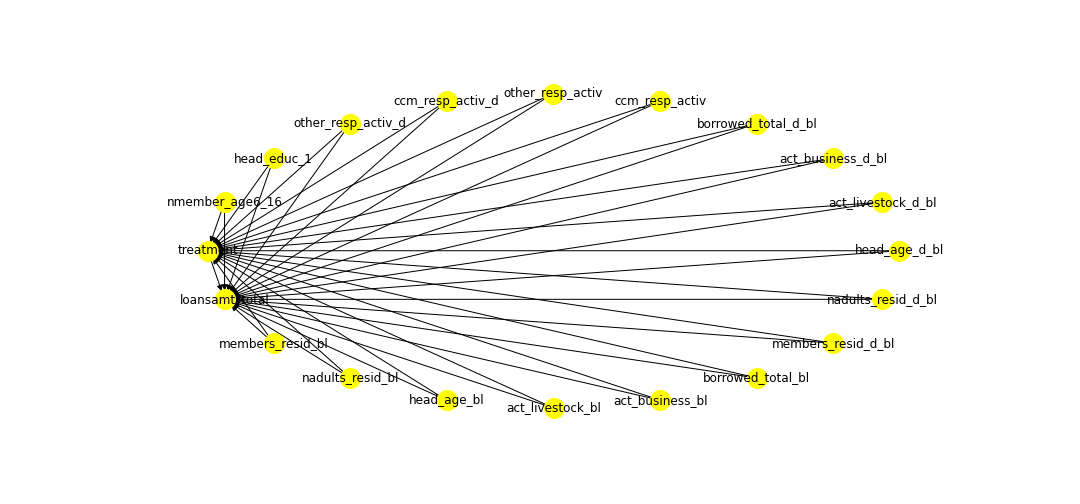

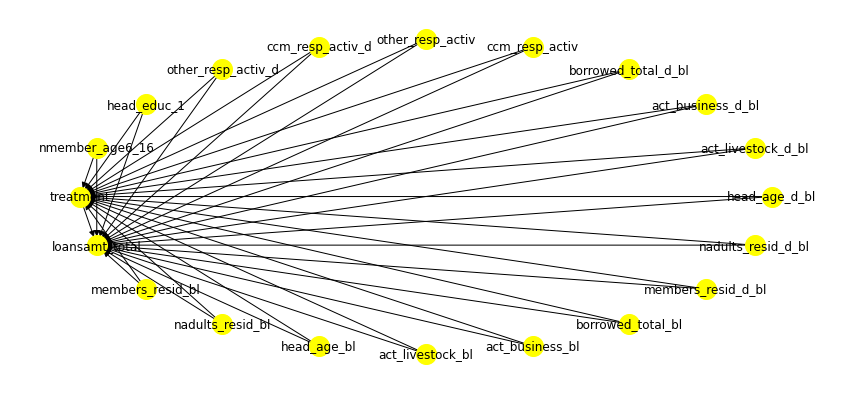

In [256]:
# build causal graph with dowhy
model = CausalModel(
    data=df,
    treatment=treatment,
    outcome=outcome,
    common_causes=covariates,
    instruments=None,
    effect_modifiers=None)
model.view_model()
display(Image(filename="causal_model.png"))

In [264]:
from sklearn.model_selection import train_test_split
# drop missing data
df = df.dropna(axis=0, subset=all_variables)

# split data into train and test sets
train, test = train_test_split(df, test_size=0.2)

# set variables for causal forest Y=outcome, T=treatment, X=covariates, W=effect_modifiers
Y = train[outcome]
T = train[treatment]
X = train[covariates]
W = None
X_test = test[covariates]

In [275]:
from econml.dml import CausalForestDML
from sklearn.linear_model import LassoCV, SGDClassifier, SGDRegressor

# set parameters for causal forest
causal_forest = CausalForestDML(criterion='het',
                                n_estimators=10000,
                                min_samples_leaf=10,
                                max_depth=None,
                                max_samples=0.5,
                                discrete_treatment=False,
                                honest=True,
                                inference=True,
                                cv=10,
                                model_t=SGDClassifier(),
                                model_y=SGDRegressor(),
                                )

# fit train data to causal forest model
causal_forest.fit(Y, T, X=X, W=W)
# estimate the CATE with the test set
causal_forest.const_marginal_ate(X_test)


The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.

The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.

The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.

The MathtextBackendBitmap class was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.


In [280]:
# use causal forest model to estimate treatment effects
treatment_effects = causal_forest.effect(X)
# calculate lower bound and upper bound confidence intervals
lb, ub = causal_forest.effect_interval(X, alpha=0.05)

# convert arrays to pandas dataframes for plotting
te_df = pd.DataFrame(treatment_effects, columns=['cate'])
lb_df = pd.DataFrame(lb, columns=['lb'])
ub_df = pd.DataFrame(ub, columns=['ub'])

# merge dataframes and sort
df = te_df.merge(lb_df, left_on=te_df.index, right_on=lb_df.index, how='left')
df.drop(columns=['key_0'], inplace=True)
df = df.merge(ub_df, left_on=df.index, right_on=ub_df.index, how='left')
df.drop(columns=['key_0'], inplace=True)
df.sort_values('cate', inplace=True, ascending=True)
df.reset_index(inplace=True, drop=True)

# calculate rolling mean
z = df.rolling(window=30, center=True).mean()

ValueError: Unable to fill values because RangeIndex cannot contain NA

# MR uplift

In [1]:
import numpy as np
import pandas as pd

from mr_uplift.dataset.data_simulation import get_simple_uplift_data
from mr_uplift.mr_uplift import MRUplift

#Generate Data
y, x, t = get_simple_uplift_data(10000)
y = pd.DataFrame(y)
y.columns = ['revenue','cost', 'noise']
y['profit'] = y['revenue'] - y['cost']

#Build / Gridsearch model
uplift_model = MRUplift()
param_grid = dict(num_nodes=[8], dropout=[.1, .5], activation=[
                      'relu'], num_layers=[1, 2], epochs=[25], batch_size=[30])
uplift_model.fit(x, y, t.reshape(-1,1), param_grid = param_grid, n_jobs = 1)

#OOS ERUPT Curves
erupt_curves, dists = uplift_model.get_erupt_curves()

#predict optimal treatments with new observations
_, x_new ,_  = get_simple_uplift_data(5)
uplift_model.predict_optimal_treatments(x_new, objective_weights = np.array([.6,-.4,0,0]).reshape(1,-1))

2021-11-24 11:05:14.667797: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-24 11:05:14.667823: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-11-24 11:05:15.895951: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-11-24 11:05:15.896123: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-24 11:05:15.896130: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-24 11:05:15.896144: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running 

Using Test Data Set


array([[1.],
       [0.],
       [1.],
       [1.],
       [1.]])

In [13]:
a, b, c = get_simple_uplift_data(5)

In [16]:
a

array([[ 0.04920295,  0.02129443, -0.05169642],
       [-0.15095356,  0.05164025,  0.11473562],
       [ 0.77766129,  0.53566936, -0.15779011],
       [ 0.12577405,  0.31711903,  1.76593098],
       [-0.1222748 ,  0.03815657, -1.42129658]])